#Neural Network - A Simple Perceptron |
Assignment

1. What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.
   - Deep Learning is a branch of machine learning that uses artificial neural networks with many layers (hence "deep") to automatically learn complex patterns and representations from large amounts of data. It evolved from early work on perceptrons and shallow neural networks in the 1950s–1980s, but its true potential was unlocked in the 2000s and 2010s due to advancements in computational power (especially GPUs), availability of big data, and improved training techniques like backpropagation. Unlike traditional machine learning, which often relies on manual feature engineering and simpler models (e.g., decision trees, SVMs), deep learning automatically extracts high-level features directly from raw data such as images, audio, and text, making it especially powerful for tasks like computer vision, natural language processing, and speech recognition. In short, deep learning reduces the need for handcrafted features and achieves superior performance in complex, unstructured data domains compared to traditional machine learning.

2.  Explain the basic architecture and functioning of a Perceptron. What are its
limitations?
    - A perceptron is the simplest type of artificial neural network, introduced by Frank Rosenblatt in 1958. Its basic architecture consists of input nodes (features), associated weights, a summation function, an activation function, and an output. Each input value is multiplied by its corresponding weight, and all weighted inputs are summed together along with a bias term. This sum is then passed through an activation function (such as a step function) to produce the final output, usually a binary decision (0 or 1). The perceptron learns by adjusting its weights during training to minimize errors. However, its main limitation is that it can only solve linearly separable problems (like AND, OR) and fails on non-linear ones (like XOR). It also lacks hidden layers, which restricts its ability to capture complex patterns, making it unsuitable for real-world problems until multi-layer perceptrons and backpropagation were developed.


3.  Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.
    - The activation function in a neural network introduces non-linearity into the model, enabling it to learn complex patterns and relationships beyond simple linear mappings. Without activation functions, neural networks would behave like linear regression models, regardless of the number of layers. The **Sigmoid** function squashes input values into the range (0,1), making it useful for probabilities, but it suffers from vanishing gradients and slow convergence for very large or small inputs. The **Tanh** function is similar in shape but outputs values in the range (−1,1), making it zero-centered and generally better than Sigmoid for hidden layers, though it still faces vanishing gradient issues. The **ReLU (Rectified Linear Unit)** function outputs zero for negative inputs and the input itself for positive values, making it computationally efficient, faster to train, and effective for deep networks. However, ReLU can suffer from the "dying ReLU" problem where neurons get stuck outputting zero. In practice, ReLU and its variants are widely preferred over Sigmoid and Tanh for most hidden layers in deep learning.


4. What is the difference between Loss function and Cost function in neural
networks? Provide examples.
   - In neural networks, a loss function measures the error for a single training example, while a cost function (sometimes called the objective function) represents the average or aggregate error across the entire training dataset. In simple terms, the loss function tells us how wrong the model is for one sample, and the cost function tells us how wrong the model is on average for all samples.

For example, in regression tasks, the Mean Squared Error (MSE) is often used as a cost function, while the squared error for one data point
(
𝑦
−
𝑦
^
)
2
(y−
y
^​
)
2
 is the loss function. Similarly, in classification tasks, Cross-Entropy Loss gives the error for a single instance, whereas the cost function would be the mean of cross-entropy losses across the dataset. Thus, the loss function is at the instance level, and the cost function is at the dataset (or batch) level.

5. What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.
   - Optimizers in neural networks are algorithms that adjust the model’s parameters (weights and biases) during training to minimize the cost function and improve accuracy. They work by updating parameters based on the gradients calculated through backpropagation. Gradient Descent is the most basic optimizer, which updates weights in the opposite direction of the gradient. While simple and effective, it can be slow and may get stuck in local minima. RMSprop (Root Mean Square Propagation) improves on this by adapting the learning rate for each parameter using a moving average of squared gradients, which helps in faster convergence and works well for non-stationary objectives like recurrent neural networks. Adam (Adaptive Moment Estimation) combines the advantages of RMSprop and Momentum by keeping track of both the moving average of gradients and their squared values, making it adaptive, efficient, and generally faster in practice. Adam is widely used as a default optimizer in deep learning because it usually converges quicker and handles sparse gradients better than basic Gradient Descent or RMSprop.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with SGD optimizer...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with RMSprop optimizer...
Training with Adam optimizer...


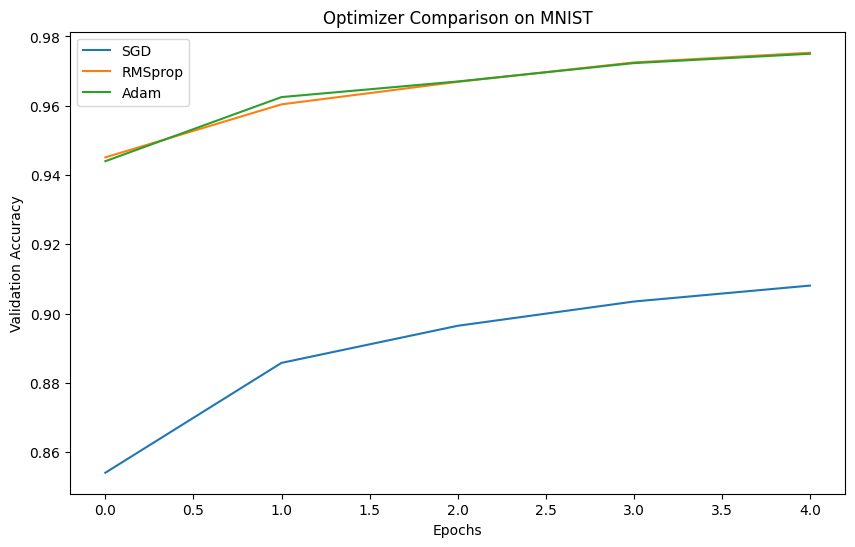

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # normalize

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Function to build a simple model
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define optimizers
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

histories = {}

# Train models with different optimizers
for name, opt in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = build_model(opt)
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=5, batch_size=128, verbose=0)
    histories[name] = history

# Plot accuracy comparison
plt.figure(figsize=(10,6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Optimizer Comparison on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


6. Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.
(Include your Python code and output in the code box below.)

In [3]:
import numpy as np

# Step 1: Define input and output for AND gate
# Input: 4 possible combinations (2 features)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# AND gate outputs
y = np.array([0, 0, 0, 1])

# Step 2: Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# Step 3: Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Step 4: Training the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)

        # Update rule: Δw = lr * (y_true - y_pred) * x
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    print(f"Epoch {epoch+1}: Weights = {weights}, Bias = {bias}")

# Step 5: Testing the perceptron
print("\nFinal Results:")
for i in range(len(X)):
    linear_output = np.dot(X[i], weights) + bias
    y_pred = step_function(linear_output)
    print(f"Input: {X[i]} => Predicted: {y_pred}, Expected: {y[i]}")


Epoch 1: Weights = [0.1 0.1], Bias = 0.0
Epoch 2: Weights = [0.2 0.1], Bias = -0.1
Epoch 3: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 4: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 5: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 6: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 7: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 8: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 9: Weights = [0.2 0.1], Bias = -0.20000000000000004
Epoch 10: Weights = [0.2 0.1], Bias = -0.20000000000000004

Final Results:
Input: [0 0] => Predicted: 0, Expected: 0
Input: [0 1] => Predicted: 0, Expected: 0
Input: [1 0] => Predicted: 0, Expected: 0
Input: [1 1] => Predicted: 1, Expected: 1


7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.
(Include your Python code and output in the code box below.)

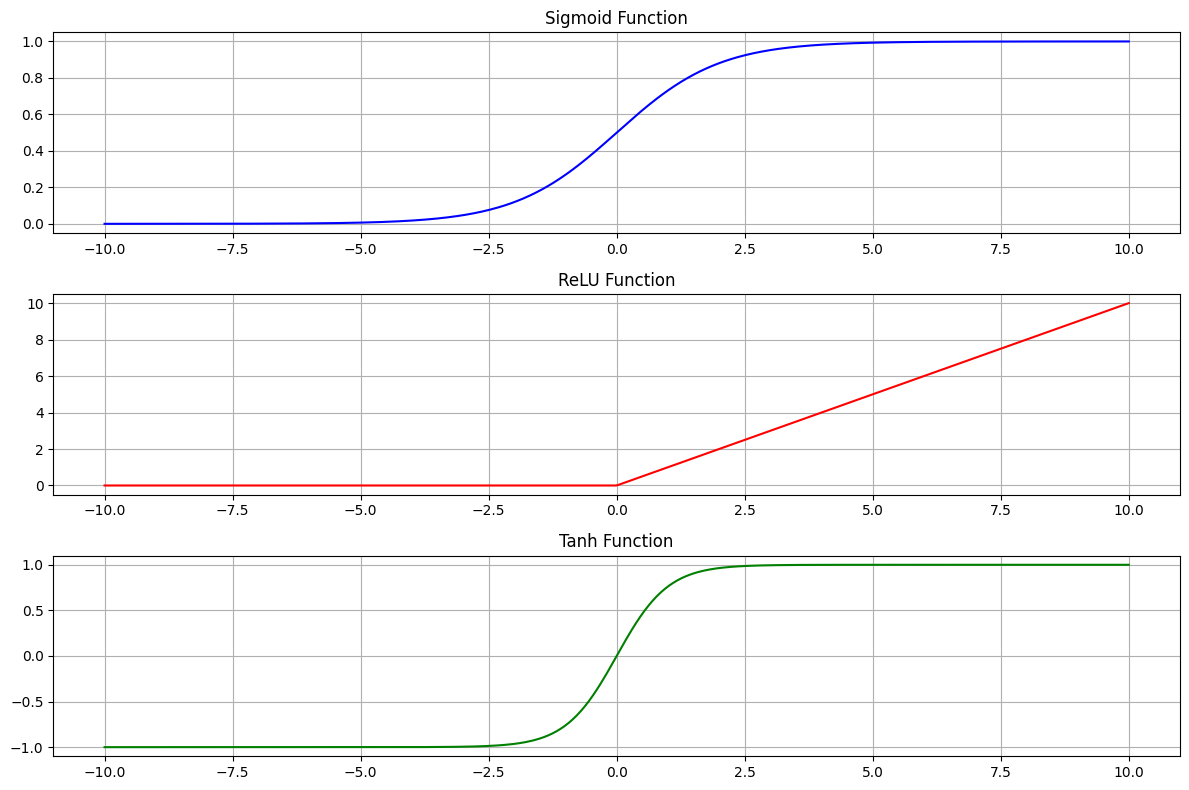

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-10, 10, 500)

# Compute function outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plotting
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(3, 1, 1)
plt.plot(x, y_sigmoid, 'b')
plt.title("Sigmoid Function")
plt.grid(True)

# ReLU
plt.subplot(3, 1, 2)
plt.plot(x, y_relu, 'r')
plt.title("ReLU Function")
plt.grid(True)

# Tanh
plt.subplot(3, 1, 3)
plt.plot(x, y_tanh, 'g')
plt.title("Tanh Function")
plt.grid(True)

plt.tight_layout()
plt.show()


8. Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.
(Include your Python code and output in the code box below.)

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Flatten 28x28 images into 784 features
    Dense(128, activation='relu'),         # Hidden layer 1
    Dense(64, activation='relu'),          # Hidden layer 2
    Dense(10, activation='softmax')        # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

# Print training accuracy
train_acc = history.history['accuracy'][-1]
print(f"\nFinal Training Accuracy: {train_acc:.4f}")


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8100 - loss: 0.6491
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9578 - loss: 0.1457
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9714 - loss: 0.0949
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9784 - loss: 0.0717
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9841 - loss: 0.0544

Final Training Accuracy: 0.9827


9. Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.
(Include your Python code and output in the code box below.)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7445 - loss: 0.7473 - val_accuracy: 0.8078 - val_loss: 0.5161
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8575 - loss: 0.4064 - val_accuracy: 0.8485 - val_loss: 0.4201
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8734 - loss: 0.3524 - val_accuracy: 0.8679 - val_loss: 0.3775
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8828 - loss: 0.3231 - val_accuracy: 0.8621 - val_loss: 0.3757
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8879 - loss: 0.3052 - val_accuracy: 0.8609 - val_loss: 0.3713
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8928 - loss: 0.2883 - val_accuracy: 0.8693 - val_loss: 0.3538
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6

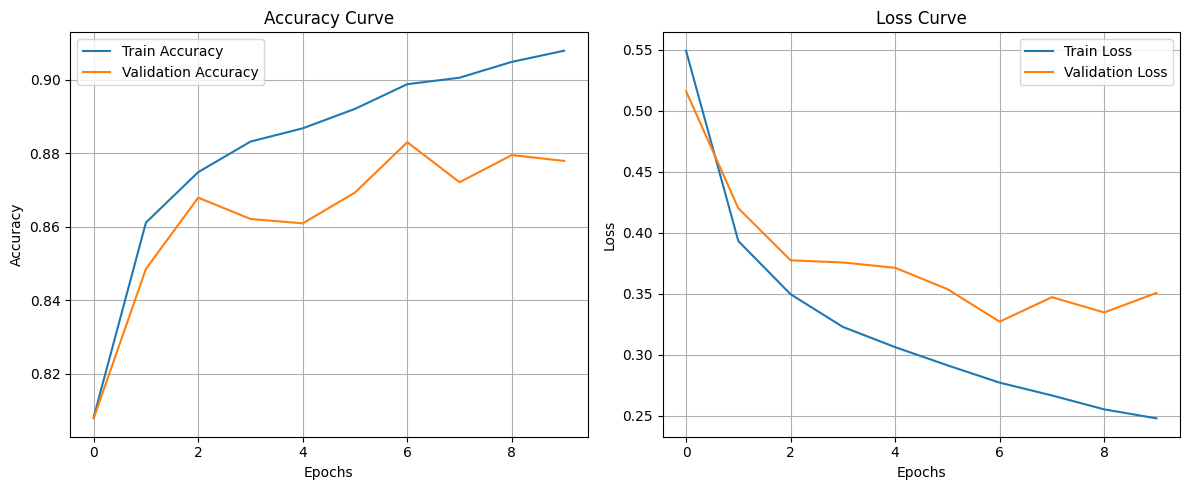

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=128, verbose=1)

# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


10. You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?
(Include your Python code and output in the code box below.)
   - Here’s a comprehensive workflow and Python implementation for building a fraud detection model using a multilayer neural network (MLP) for a large, imbalanced banking dataset.

Real-Time Data Science Workflow
1. Model Design

Use a Multilayer Perceptron (MLP) with 2–3 hidden layers for structured features.

Each layer has ReLU activation for non-linearity.

Output layer uses Sigmoid activation to predict the probability of a transaction being fraudulent.

2. Activation and Loss Functions

Hidden layers: ReLU → prevents vanishing gradients and trains deep networks efficiently.

Output layer: Sigmoid → outputs probability between 0 and 1.

Loss function: Binary Cross-Entropy → suitable for binary classification.

3. Training and Class Imbalance

Use class weighting or oversampling (SMOTE) to address imbalance.

Monitor both accuracy and ROC-AUC since accuracy alone can be misleading.

4. Optimizer and Overfitting Prevention

Optimizer: Adam → adaptive learning rates and fast convergence.

Overfitting prevention: Dropout layers, early stopping, and L2 regularization.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight

# Simulate structured transaction dataset
np.random.seed(42)
n_samples = 10000
n_features = 10

# Features: transaction amount, merchant ID, location etc.
X = np.random.rand(n_samples, n_features)

# Target: 0 = legitimate, 1 = fraud (5% fraud)
y = np.random.choice([0, 1], size=n_samples, p=[0.95, 0.05])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

# Build MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model with class weights
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    class_weight=class_weights,
                    verbose=1)

# Evaluate model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7333 - loss: 0.7343 - val_accuracy: 0.3931 - val_loss: 0.7210
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.6672 - val_accuracy: 0.5181 - val_loss: 0.6893
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4877 - loss: 0.7195 - val_accuracy: 0.6381 - val_loss: 0.6508
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6571 - loss: 0.6875 - val_accuracy: 0.5131 - val_loss: 0.6873
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5412 - loss: 0.6801 - val_accuracy: 0.5219 - val_loss: 0.6857
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5769 - loss: 0.6791 - val_accuracy: 0.5525 - val_loss: 0.6763
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.6832 - val_accuracy: 0.5181 - val_loss: 0.6893
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5585 - loss: 0.6850 - val_accuracy: 0.